In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#GIT https://github.com/bnsreenu/python_for_microscopists/blob/master/158b_transfer_learning_using_CNN_weights_VGG16_RF.py (video: https://www.youtube.com/watch?v=IuoEiemAuIY)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import seaborn as sns
import tensorflow as tf
import os
import glob
import cv2
import re

In [ ]:
SIZE = 600
folder_path = "/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset"

In [ ]:
train_images = []
sample_num = []
img_path_list = []

for img_path in glob.glob(os.path.join(folder_path, "*.tif")):

  img_path_list.append(img_path)
  print(img_path)
  #num = img_path.split("_")[-3].split("/")[1] #"-5" for testset
  num = img_path.split("/")[-1]
  num = num.replace(r"testset_600", '') #use only for 224x224 dataset!
  num = num.replace(r".tif", '')
  print(num)
  #num = re.findall(r'\d+', num)

  if num != ['46', '1']:
    sample_num.append(num)
  else:
    ### there is "46-1" and not "46" in image names, make sure naming convention is consistent!
    sample_num.append(["46"])
  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  ### subtract from 255 if background px==0! Or invert with numpy
  img = np.invert(img)
  img = cv2.resize(img, (SIZE, SIZE))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  train_images.append(img)

/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600100W_650mms_1_6.tif
100W_650mms_1_6
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600100W_650mms_2_1.tif
100W_650mms_2_1
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600100W_650mms_1_7.tif
100W_650mms_1_7
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600100W_650mms_1_5.tif
100W_650mms_1_5
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600120W_750mms_3_7.tif
120W_750mms_3_7
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600100W_650mms_1_2.tif
100W_650mms_1_2
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_600_testset/testset_600100W_650mms_1_4.tif
100W_650mms_1_4
/content/drive/MyDrive/Cola

In [ ]:
sample_num

['100W_650mms_1_6',
 '100W_650mms_2_1',
 '100W_650mms_1_7',
 '100W_650mms_1_5',
 '120W_750mms_3_7',
 '100W_650mms_1_2',
 '100W_650mms_1_4',
 '100W_650mms_2_6',
 '100W_650mms_2_3',
 '100W_650mms_2_2',
 '100W_650mms_1_1',
 '120W_750mms_2_3',
 '120W_750mms_1_6',
 '120W_750mms_2_2',
 '120W_750mms_2_1',
 '120W_750mms_1_7',
 '120W_750mms_1_5',
 '120W_750mms_1_2',
 '120W_750mms_1_4',
 '120W_750mms_1_1',
 '120W_750mms_1_3',
 '120W_700mms_3_4',
 '120W_700mms_3_6',
 '120W_700mms_3_5',
 '120W_700mms_3_1',
 '120W_700mms_3_2',
 '120W_700mms_3_3',
 '120W_700mms_2_4',
 '120W_700mms_2_5',
 '120W_700mms_3_7',
 '120W_700mms_2_7',
 '120W_700mms_1_7',
 '120W_700mms_2_1',
 '120W_700mms_2_2',
 '120W_700mms_1_6',
 '120W_700mms_1_4',
 '120W_700mms_1_1',
 '120W_650mms_3_7',
 '120W_700mms_1_2',
 '120W_700mms_2_6',
 '120W_700mms_2_3',
 '120W_700mms_1_3',
 '120W_650mms_3_6',
 '120W_650mms_3_5',
 '120W_650mms_3_3',
 '120W_650mms_3_2',
 '120W_650mms_3_1',
 '120W_650mms_2_4',
 '120W_650mms_2_7',
 '120W_650mms_2_3',


In [ ]:
train_images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
train_images = np.array(train_images)

In [ ]:
X_train = train_images/255.0

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE,SIZE,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in VGG_model.layers:
	layer.trainable = False

In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 600, 600, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 600, 600, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 600, 600, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 300, 300, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 300, 300, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 300, 300, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 150, 150, 128)     0     

In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
feature_extractor = VGG_model.predict(X_train)


3/3 [==============================] - 174s 52s/step


In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
features.shape

(81, 165888)

In [ ]:
# export feature space as pickle
import pickle

with open('230812_MINI_vgg16_features_31_20_testset_600x600.pickle', 'wb') as handle:
    pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# export img names as pickle
import pickle

with open('230812_MINI_img_path_31_20_testset_600x600.pickle', 'wb') as handle:
    pickle.dump(img_path_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# export samplelist as pickle

with open('230812_MINI_sample_list_31_20_testset_600x600.pickle', 'wb') as handle:
    pickle.dump(sample_num, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
sample_num

['100W_650mms_1_6.tif',
 '100W_650mms_2_1.tif',
 '100W_650mms_1_7.tif',
 '100W_650mms_1_5.tif',
 '120W_750mms_3_7.tif',
 '100W_650mms_1_2.tif',
 '100W_650mms_1_4.tif',
 '100W_650mms_2_6.tif',
 '100W_650mms_2_3.tif',
 '100W_650mms_2_2.tif',
 '100W_650mms_1_1.tif',
 '120W_750mms_2_3.tif',
 '120W_750mms_1_6.tif',
 '120W_750mms_2_2.tif',
 '120W_750mms_2_1.tif',
 '120W_750mms_1_7.tif',
 '120W_750mms_1_5.tif',
 '120W_750mms_1_2.tif',
 '120W_750mms_1_4.tif',
 '120W_750mms_1_1.tif',
 '120W_750mms_1_3.tif',
 '120W_700mms_3_4.tif',
 '120W_700mms_3_6.tif',
 '120W_700mms_3_5.tif',
 '120W_700mms_3_1.tif',
 '120W_700mms_3_2.tif',
 '120W_700mms_3_3.tif',
 '120W_700mms_2_4.tif',
 '120W_700mms_2_5.tif',
 '120W_700mms_3_7.tif',
 '120W_700mms_2_7.tif',
 '120W_700mms_1_7.tif',
 '120W_700mms_2_1.tif',
 '120W_700mms_2_2.tif',
 '120W_700mms_1_6.tif',
 '120W_700mms_1_4.tif',
 '120W_700mms_1_1.tif',
 '120W_650mms_3_7.tif',
 '120W_700mms_1_2.tif',
 '120W_700mms_2_6.tif',
 '120W_700mms_2_3.tif',
 '120W_700mms_1_

# Testset on CNN

In [ ]:
SIZE = 200
folder_path = "/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori"

In [ ]:
test_images = []
sample_num = []
img_path_list = []

for img_path in glob.glob(os.path.join(folder_path, "*")):
  print(img_path)
  img_path_list.append(img_path)
  num = img_path.split("_")[-3]
  num = re.findall(r'\d+', num)
  sample_num.append(num)

  img = cv2.imread(img_path, cv2.IMREAD_COLOR)
  img = np.invert(img)
  img = cv2.resize(img, (SIZE, SIZE))
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  test_images.append(img)

/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_14_10_10.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_1_4.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_1_3.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_1_1.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_2_7.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_2_9.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_1_2.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_13_2_3.tif
/content/drive/MyDrive/Colab Notebooks/Yujung/LOM/MINI/testsets/processedImages_6_ori/6_originalHiMn_1

In [ ]:
test_images = np.array(test_images)

In [ ]:
X_test = test_images/255.0

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE,SIZE,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
feature_extractor = VGG_model.predict(X_test)

7/7 [==============================] - 50s 7s/step


In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
features.shape

(200, 18432)

In [ ]:
# export feature space as pickle
import pickle

with open('230808_vgg16_features_testset_6_ori.pickle', 'wb') as handle:
    pickle.dump(features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# export img names as pickle
import pickle

with open('230808_img_path_testset_6_ori.pickle', 'wb') as handle:
    pickle.dump(img_path_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# export samplelist as pickle

with open('230808_sample_list_testset_6_ori_inverted.pickle', 'wb') as handle:
    pickle.dump(sample_num, handle, protocol=pickle.HIGHEST_PROTOCOL)

#medium article https://medium.com/coinmonks/vgg16-and-vgg19-cnn-models-how-to-extract-features-display-filters-and-create-feature-maps-c456cc2ef6b1

In [ ]:
model = VGG16(weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
img_path = "/content/drive/MyDrive/Colab Notebooks/Yujung/dataset/porosity_images/processedImages10_1_1.jpg"
img = image.load_img(img_path, target_size = (224,224))

x = image.img_to_array(img)

x = x - 255
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features.shape)
print(features)

1/1 [==============================] - 3s 3s/step
(1, 7, 7, 512)
[[[[0.         0.         0.         ... 0.         1.0843744
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         3.0583036
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.        

In [ ]:
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)



553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
block4_pool_features = model.predict(x)
print(block4_pool_features.shape)
print(block4_pool_features)

1/1 [==============================] - 1s 617ms/step
(1, 14, 14, 512)
[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.         62.865345
     0.        ]
   [ 0.          0.          0.         ...  0.         33.080734
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.        

In [ ]:
from matplotlib import pyplot

model = VGG16()

for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


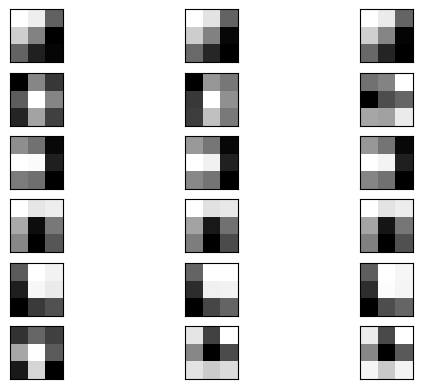

In [ ]:
filters,biases = model.layers[1].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters, ix = 6, 1
for i in range(n_filters):
  f = filters[:, :, :, i]
  for j in range(3):
    ax = pyplot.subplot(n_filters, 3, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(f[:,:,j], cmap='gray')
    ix+=1
pyplot.show()

In [ ]:
for i in range(len(model.layers)):
  layer = model.layers[i]
  if 'conv' not in layer.name:
    continue
  print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 71ms/step


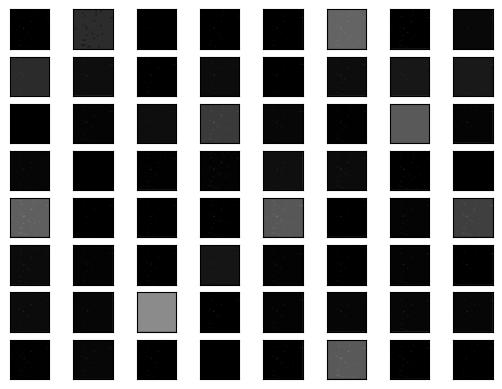

In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()
feature_maps = model.predict(x)
square = 8
ix = 1
for _ in range(square):
  for _ in range(square):
    ax = pyplot.subplot(square,square, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    pyplot.imshow(feature_maps[0,:,:,ix-1],cmap='gray')
    ix+=1
pyplot.show()

1/1 [==============================] - 1s 757ms/step


TypeError: ignored

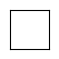

In [ ]:
ixs = [2, 5, 9, 13, 17]
model = VGG16()
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=model.outputs)

feature_maps = model.predict(x)
square = 8
for fmap in feature_maps:
  ix = 1
  for _ in range(square):
    for _ in range(square):
      ax = pyplot.subplot(square,square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(fmap[0,:,:,ix-1],cmap='gray')
      ix+=1
pyplot.show()

(1, 1000)